<a href="https://colab.research.google.com/github/ChoiSeEun/Data_Analysis_Study/blob/main/Zio/02%EC%9E%A5_%EC%8B%AC%ED%99%94_Kaggle_Supermarket_sales_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

filename1 = "/content/drive/MyDrive/파이썬 데이터 분석 실무 테크닉 100/2장/supermarket_sales - Sheet1.csv"

data = pd.read_csv(filename1)
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

**결측치 확인**

In [ ]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

**이름 오탈자 혹은 오류 확인**

In [ ]:
# 브랜치 확인

print(pd.unique(data["Branch"]))

['A' 'C' 'B']


In [ ]:
# 도시 확인

print(pd.unique(data["City"]))

['Yangon' 'Naypyitaw' 'Mandalay']


In [ ]:
# 성별 확인

print(pd.unique(data["Gender"]))

['Female' 'Male']


In [ ]:
# 상품 종류 확인

print(pd.unique(data["Product line"]))

['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


**날짜, 시간 전처리**

In [ ]:
is_serial = data["Date"].astype("str").str.isdigit()  # 판매 건수의 날짜가 숫자인지 아닌지 판정
is_serial.sum() 

0

**최고 매출 파악**

In [ ]:
# 최고 매출을 내고 있는 브랜치, 지역 찾기

byPrice = data.pivot_table(index = ["Branch", "City"], values = "Total", aggfunc = "sum", fill_value = 0)
byPrice

,,Total
Branch,City,
A,Yangon,106200.3705
B,Mandalay,106197.6720
C,Naypyitaw,110568.7065


**각 브랜치의 소비자 평점 비교**

In [ ]:
# Rating 칼럼 전처리
# 소수점 첫째자리에서 반올림해서 1-10의 10가지 항목만 남도록 함

data["Rating"] = data["Rating"].round()
data["Rating"].head()

0     9.0
1    10.0
2     7.0
3     8.0
4     5.0
Name: Rating, dtype: float64

In [ ]:
# pivot table 이용하여 데이터 집계

pie_data = data.pivot_table(index = "Branch", columns = "Rating", aggfunc = "size")
pie_data

Rating,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Branch,,,,,,,
A,36,39,60,62,60,50,33
B,37,52,69,48,56,41,29
C,29,42,64,49,63,50,31


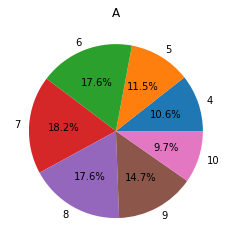

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ratio = [36, 39, 60, 62, 60, 50, 33]
labels = [4, 5, 6, 7, 8, 9, 10]

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('A')
plt.show()

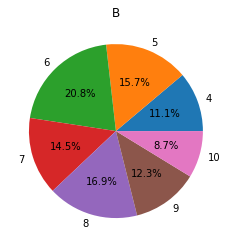

In [ ]:
ratio = [37, 52, 69, 48, 56, 41, 29]
labels = [4, 5, 6, 7, 8, 9, 10]

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('B')
plt.show()

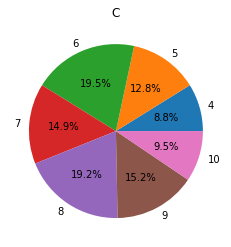

In [ ]:
ratio = [29, 42, 64, 49, 63, 50, 31]
labels = [4, 5, 6, 7, 8, 9, 10]

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('C')
plt.show()

In [ ]:
# 각 브랜치 별 평균 평점 구하기

average_data = data.pivot_table('Rating', index = "Branch", aggfunc = "mean")
average_data

,Rating
Branch,
A,7.038235
B,6.822289
C,7.064024


In [ ]:
# 각 브랜치 별, 성별 별 평균 평점 구하기

gender_data = data.pivot_table('Rating', index = 'Branch', columns = 'Gender', aggfunc = "mean")
gender_data

Gender,Female,Male
Branch,,
A,6.838509,7.217877
B,6.870370,6.776471
C,7.162921,6.946667
